NPM: 6181801030 

Nama: Clement Rivandi

NPM: 6181801032

Nama: Ivan Limosi

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

# Membaca data pada file diamonds.csv dan menyimpannya di variabel data
data = pd.read_csv('diamonds.csv')
data

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Pada tugas ini, eksplorasi akan dilakukan dengan menggunakan dua macam atribut yaitu atribut numerik dan atribut kategorik. Karena tugas dibuat untuk menentukan harga sebuah berlian, maka atribut price akan dibandingkan dengan atribut-atribut lainnya.

Atribut numerik yang digunakan :
- carat
- x
- y
- z
- depth
- table

Atribut kategorik yang digunakan :
- cut
- color
- clarity

# Eksplorasi dengan atribut numerik
Eksplorasi pertama dilakukan dengan membandingkan atribut price dengan beberapa atribut numerik. Perbandingan dibuat dengan menggunakan scatter plot agar hubungan antar atribut lebih terlihat.

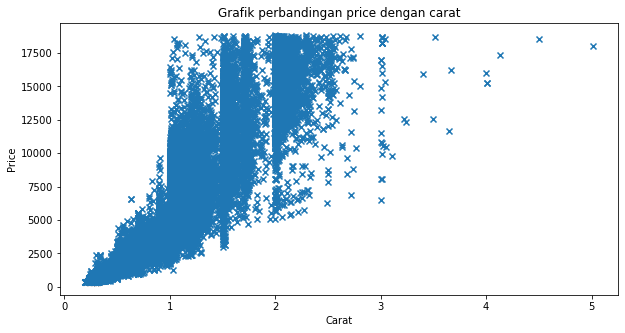

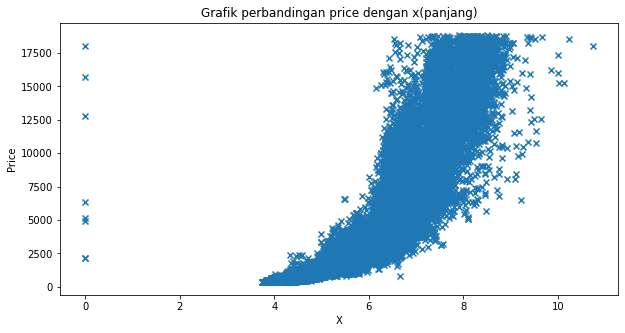

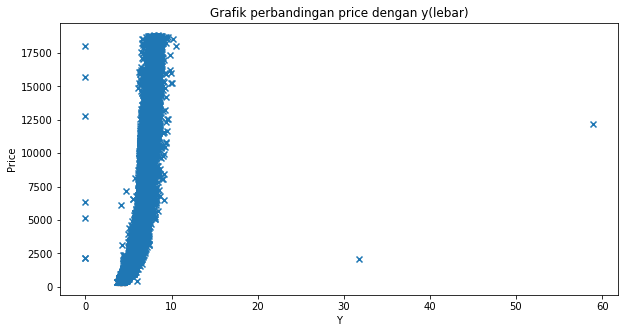

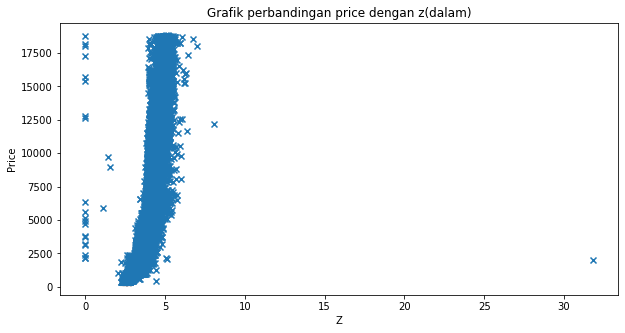

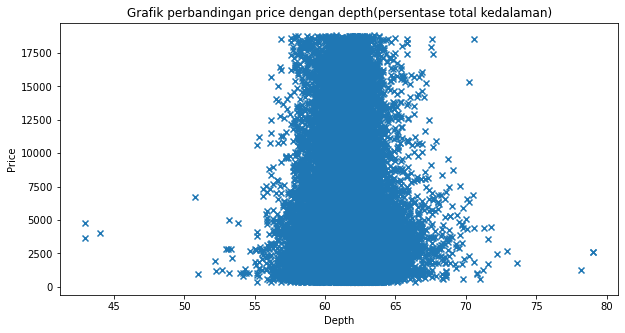

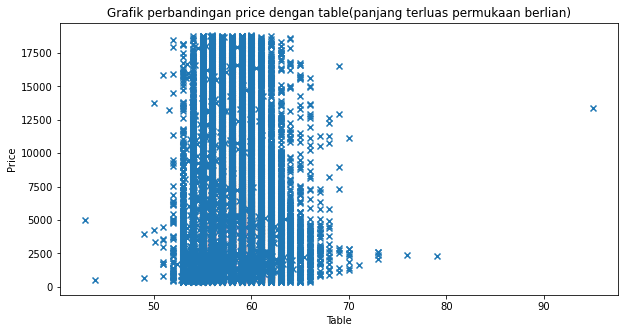

In [22]:
# Membuat grafik untuk melihat hubungan antara atribut Price dengan Carat. 
PriceToCarat = data[['carat','price']].sort_values('carat')
plt.figure(figsize=[10,5])
plt.title('Grafik perbandingan price dengan carat')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.scatter(PriceToCarat['carat'], PriceToCarat['price'], marker='x')
plt.show()

# Membuat grafik untuk melihat hubungan antara atribut Price dengan X(panjang)
PriceToX = data[['x','price']].sort_values('x')
plt.figure(figsize=[10,5])
plt.title('Grafik perbandingan price dengan x(panjang)')
plt.xlabel('X')
plt.ylabel('Price')
plt.scatter(PriceToX['x'], PriceToX['price'], marker='x')
plt.show()

# Membuat grafik untuk melihat hubungan antara atribut Price dengan Y(lebar)
PriceToY = data[['y','price']].sort_values('y')
plt.figure(figsize=[10,5])
plt.title('Grafik perbandingan price dengan y(lebar)')
plt.xlabel('Y')
plt.ylabel('Price')
plt.scatter(PriceToY['y'], PriceToY['price'], marker='x')
plt.show()

# Membuat grafik untuk melihat hubungan antara atribut Price dengan Z(dalam)
PriceToZ = data[['z','price']].sort_values('z')
plt.figure(figsize=[10,5])
plt.title('Grafik perbandingan price dengan z(dalam)')
plt.xlabel('Z')
plt.ylabel('Price')
plt.scatter(PriceToZ['z'], PriceToZ['price'], marker='x')
plt.show()

# Membuat grafik untuk melihat hubungan antara atribut Price dengan depth(persentase total kedalaman)
PriceToDepth = data[['depth','price']].sort_values('depth')
plt.figure(figsize=[10,5])
plt.title('Grafik perbandingan price dengan depth(persentase total kedalaman)')
plt.xlabel('Depth')
plt.ylabel('Price')
plt.scatter(PriceToDepth['depth'], PriceToDepth['price'], marker='x')
plt.show()

# Membuat grafik untuk melihat hubungan antara atribut Price dengan table(panjang terluas permukaan berlian)
PriceToTable = data[['table','price']].sort_values('table')
plt.figure(figsize=[10,5])
plt.title('Grafik perbandingan price dengan table(panjang terluas permukaan berlian)')
plt.xlabel('Table')
plt.ylabel('Price')
plt.scatter(PriceToTable['table'], PriceToTable['price'], marker='x')
plt.show()


Dari hasil pembuatan grafik scatter plot diatas, dapat dilihat bahwa atribut Price memiliki hubungan yang kuat dengan dengan atribut Carat, X, Y, dan Z. Atribut Price juga memiliki hubungan yang lemah dengan Depth dan Table. Setelah membuat grafik, dibuat juga perhitungan angka korelasi untuk menentukan atribut yang akan digunakan untuk membuat model.

In [39]:
print("korelasi antara atribut Price dengan Carat : " + str(np.corrcoef(PriceToCarat['carat'], PriceToCarat['price'])))
print("korelasi antara atribut Price dengan X(panjang) : " + str(np.corrcoef(PriceToX['x'], PriceToX['price'])))
print("korelasi antara atribut Price dengan Y(lebar) : " + str(np.corrcoef(PriceToY['y'], PriceToY['price'])))
print("korelasi antara atribut Price dengan Z(dalam) : " + str(np.corrcoef(PriceToZ['z'], PriceToZ['price'])))
print("korelasi antara atribut Price dengan Depth(persentase total kedalaman) : " + str(np.corrcoef(PriceToDepth['depth'], PriceToDepth['price'])))
print("korelasi antara atribut Price dengan Table(panjang terluas permukaan berlian) : " + str(np.corrcoef(PriceToTable['table'], PriceToTable['price'])))

korelasi antara atribut Price dengan Carat : [[1.        0.9215913]
 [0.9215913 1.       ]]
korelasi antara atribut Price dengan X(panjang) : [[1.         0.88443516]
 [0.88443516 1.        ]]
korelasi antara atribut Price dengan Y(lebar) : [[1.        0.8654209]
 [0.8654209 1.       ]]
korelasi antara atribut Price dengan Z(dalam) : [[1.         0.86124944]
 [0.86124944 1.        ]]
korelasi antara atribut Price dengan Depth(persentase total kedalaman) : [[ 1.        -0.0106474]
 [-0.0106474  1.       ]]
korelasi antara atribut Price dengan Table(panjang terluas permukaan berlian) : [[1.        0.1271339]
 [0.1271339 1.       ]]


Setelah membuat perhitungan angka korelasi, didapatkan bahwa atribut Price memiliki hubungan yang kuat dengan atribut Carat(0.9215913), X(0.88443516), Y(0.8654209), dan Z(0.86124944) namun memiliki hubungan yang berbanding terbalik dengan atribut Depth(-0.0106474) serta hubungan yang lemah dengan atribut Table(0.1271339). Untuk menentukan atribut yang akan digunakan, maka atribut yang memiliki korelasi positif akan dilihat kebergantungannya dengan membuar scatter plot dan membuat nilai angka korelasi.

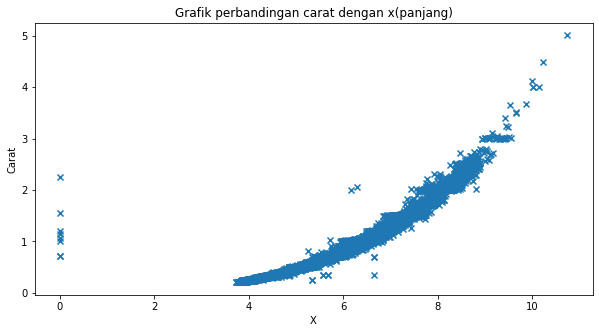

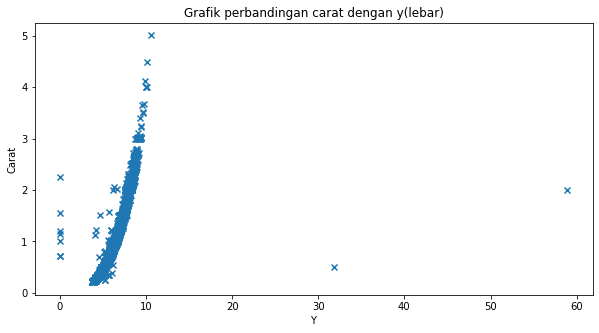

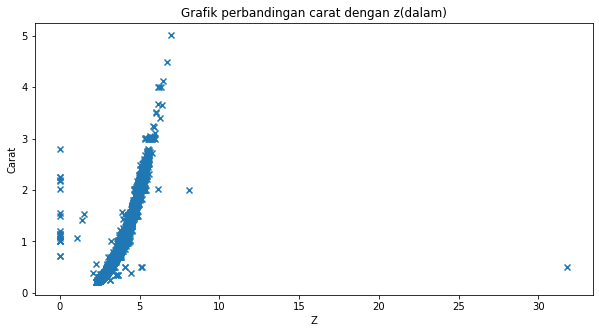

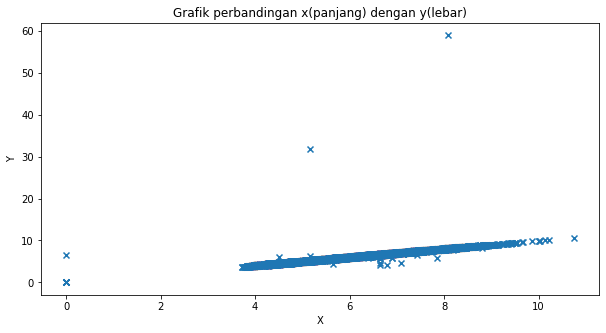

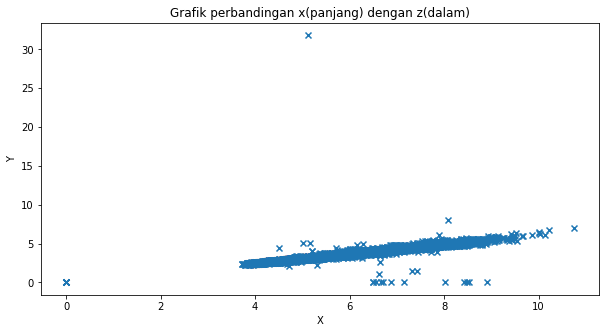

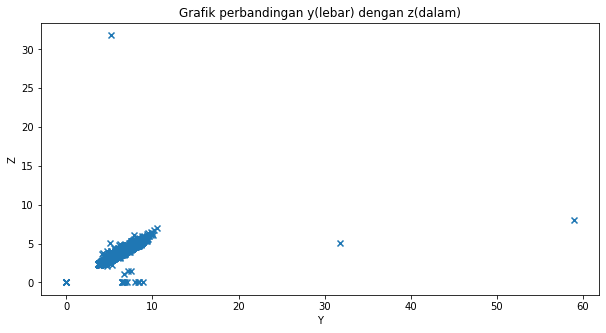

In [66]:
# Membuat grafik untuk melihat hubungan antara atribut Carat dengan X(panjang)
CaratToX = data[['x','carat']].sort_values('x')
plt.figure(figsize=[10,5])
plt.title('Grafik perbandingan carat dengan x(panjang)')
plt.xlabel('X')
plt.ylabel('Carat')
plt.scatter(CaratToX['x'], CaratToX['carat'], marker='x')
plt.show()

# Membuat grafik untuk melihat hubungan antara atribut Carat dengan Y(lebar)
CaratToY = data[['y','carat']].sort_values('y')
plt.figure(figsize=[10,5])
plt.title('Grafik perbandingan carat dengan y(lebar)')
plt.xlabel('Y')
plt.ylabel('Carat')
plt.scatter(CaratToY['y'], CaratToY['carat'], marker='x')
plt.show()

# Membuat grafik untuk melihat hubungan antara atribut Carat dengan Z(dalam)
CaratToZ = data[['z','carat']].sort_values('z')
plt.figure(figsize=[10,5])
plt.title('Grafik perbandingan carat dengan z(dalam)')
plt.xlabel('Z')
plt.ylabel('Carat')
plt.scatter(CaratToZ['z'], CaratToZ['carat'], marker='x')
plt.show()

# Membuat grafik untuk melihat hubungan antara atribut X(panjang) dengan Y(lebar)
XToY = data[['x','y']].sort_values('x')
plt.figure(figsize=[10,5])
plt.title('Grafik perbandingan x(panjang) dengan y(lebar)')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(XToY['x'], XToY['y'], marker='x')
plt.show()

# Membuat grafik untuk melihat hubungan antara atribut X(panjang) dengan Z(dalam)
XToZ = data[['x','z']].sort_values('x')
plt.figure(figsize=[10,5])
plt.title('Grafik perbandingan x(panjang) dengan z(dalam)')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(XToZ['x'], XToZ['z'], marker='x')
plt.show()

# Membuat grafik untuk melihat hubungan antara atribut Y(lebar) dengan Z(dalam)
YToZ = data[['y','z']].sort_values('y')
plt.figure(figsize=[10,5])
plt.title('Grafik perbandingan y(lebar) dengan z(dalam)')
plt.xlabel('Y')
plt.ylabel('Z')
plt.scatter(YToZ['y'], YToZ['z'], marker='x')
plt.show()

In [67]:
print("korelasi antara atribut Carat dengan X(panjang) : " + str(np.corrcoef(CaratToX['carat'], CaratToX['x'])))
print("korelasi antara atribut Carat dengan Y(lebar) : " + str(np.corrcoef(CaratToY['carat'], CaratToY['y'])))
print("korelasi antara atribut Carat dengan Z(dalam) : " + str(np.corrcoef(CaratToZ['carat'], CaratToZ['z'])))
print("korelasi antara atribut X(panjang) dengan Y(lebar) : " + str(np.corrcoef(XToY['x'], XToY['y'])))
print("korelasi antara atribut X(panjang) dengan Z(dalam) : " + str(np.corrcoef(XToZ['x'], XToZ['z'])))
print("korelasi antara atribut Y(lebar) dengan Z(dalam) : " + str(np.corrcoef(YToZ['y'], YToZ['z'])))

korelasi antara atribut Carat dengan X(panjang) : [[1.         0.97509423]
 [0.97509423 1.        ]]
korelasi antara atribut Carat dengan Y(lebar) : [[1.        0.9517222]
 [0.9517222 1.       ]]
korelasi antara atribut Carat dengan Z(dalam) : [[1.         0.95338738]
 [0.95338738 1.        ]]
korelasi antara atribut X(panjang) dengan Y(lebar) : [[1.         0.97470148]
 [0.97470148 1.        ]]
korelasi antara atribut X(panjang) dengan Z(dalam) : [[1.        0.9707718]
 [0.9707718 1.       ]]
korelasi antara atribut Y(lebar) dengan Z(dalam) : [[1.         0.95200572]
 [0.95200572 1.        ]]


Setelah membuat scatter plot dan perhitungan angka korelasi diatas, dapat disimpulkan bahwa tiap atribut yang sebelumnya telah memiliki korelasi positif dengan atribut Price memiliki kebergantungan satu sama lain sehingga atribut yang digunakan untuk memodelkan regresi adalah atribut Carat yang memiliki angka korelasi positif paling tinggi dengan Price.

# Eksplorasi dengan atribut kategorik
Eksplorasi kedua dilakukan dengan membandingkan atribut price dengan beberapa atribut bertipe kategorik.

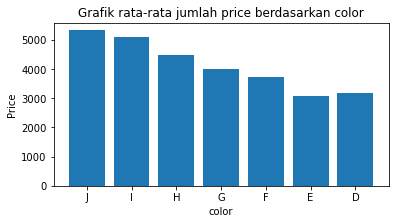

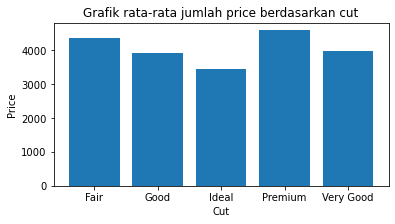

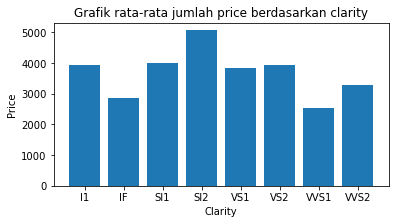

In [70]:
# Membuat grafik untuk melihat hubungan antara atribut Color dengan Price. 
# Grafik dibuat dengan membandingkan rata-rata Price dengan jenis Color.
ColorToPrice = data.groupby('color').mean().sort_values('color', ascending=False)
plt.figure(figsize=[6,3])
plt.title('Grafik rata-rata jumlah price berdasarkan color')
plt.xlabel('color')
plt.ylabel('Price')
plt.bar(ColorToPrice.index, ColorToPrice['price'])
plt.show()

# Membuat grafik untuk melihat hubungan antara atribut Cut dengan Price. 
# Grafik dibuat dengan membandingkan rata-rata Price dengan jenis Cut.
CutToPrice = data.groupby('cut').mean().sort_values('cut')
plt.figure(figsize=[6,3])
plt.title('Grafik rata-rata jumlah price berdasarkan cut')
plt.xlabel('Cut')
plt.ylabel('Price')
plt.bar(CutToPrice.index, CutToPrice['price'])
plt.show()

# Membuat grafik untuk melihat hubungan antara atribut Clarity dengan Price. 
# Grafik dibuat dengan membandingkan rata-rata Price dengan jenis Clarity.
ClarityToPrice = data.groupby('clarity').mean().sort_values('clarity')
plt.figure(figsize=[6,3])
plt.title('Grafik rata-rata jumlah price berdasarkan clarity')
plt.xlabel('Clarity')
plt.ylabel('Price')
plt.bar(ClarityToPrice.index, ClarityToPrice['price'])
plt.show()

Pada grafik diatas, dibuat perbandingan antara atribut Price dengan beberapa atribut kategorik seperti Cut, Color, dan Clarity. Tiap atribut kategorik pada grafik telah diurutan seperti contoh atribut Color telah diurutan dari yang terburuk(J) hingga paling baik(D). Terlihat pada grafik seperti contoh grafik Color ada sesuatu yang janggal karena semakin buruk tipe Color, semakin tinggi harga berlian. Begitu juga pada grafik Cut bahwa tipe Cut fair memiliki harga yang lebih tinggi dibandingkan tipe Cut Very Good. Oleh karena itu, akan dicari penyebab dari perbedaan tersebut dengan melihat persebaran dari data yang telah diberikan.

Berikut akan digunakan metode interquartile range untuk menghilangkan data pencilan atau outlier.

In [87]:
price_q1 = np.quantile(data['price'], 0.25)
price_q2 = np.quantile(data['price'], 0.50)
price_q3 = np.quantile(data['price'], 0.75)

price_iqr = price_q3 - price_q1
price_upper_fence = price_q2 + (2 * price_iqr)

data = data[data['price'] < price_upper_fence]

In [90]:
# Membuat data
y_attr = data[['color', 'cut', 'clarity']]  
y_np = np.array(y_attr.values) 
label_np = y_np.ravel()

print(y_attr)

# #Membuat labelEncoder
# le = preprocessing.LabelEncoder()

# #Mengubah String menjadi tipe data numerik
# y_data_en_attr = le.fit_transform(label_np)

      color        cut clarity
0         E      Ideal     SI2
1         E    Premium     SI1
2         E       Good     VS1
3         I    Premium     VS2
4         J       Good     SI2
...     ...        ...     ...
53935     D      Ideal     SI1
53936     D       Good     SI1
53937     D  Very Good     SI1
53938     H    Premium     SI2
53939     D      Ideal     SI2

[47176 rows x 3 columns]


ValueError: Length of values (141528) does not match length of index (47176)